Using the MNIST Dataset , we'll build two Neural Network capable of performing handwritten digits classification. THe first Network is a simple Multi-layer Perceptron (MLP) and the second one is Covulation Neural Network .

In [1]:
import tensorflow as tf
tf.__version__

/home/akarsh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'1.10.0'

### Classify MNIST using a simple model . 

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

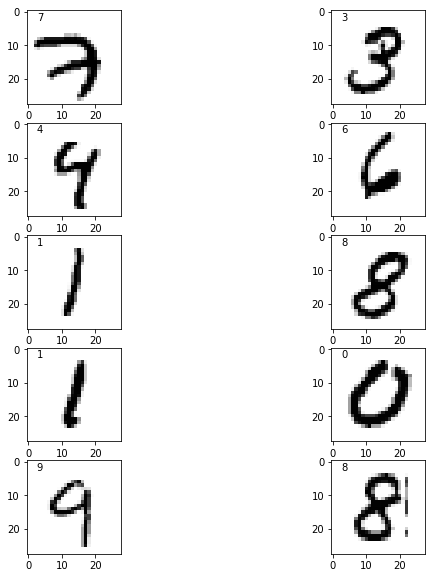

In [12]:
left= 2.5
top = 2.5

fig = plt.figure(figsize=(10,10))

for i in range(10):
    ax = fig.add_subplot(5,2,i+1)
    im = np.reshape(mnist.train.images[i,:], [28,28])
    label = np.argmax(mnist.train.labels[i,:])
    ax.imshow(im, cmap='Greys')
    ax.text(left, top, str(label))

In [13]:
sess = tf.InteractiveSession()

#### Creating placeholders 
It is a best practice to create placeholder before variables assignments when using Tensorflow . Here we'll create placeholders for inputs Xs and Ys. 
**Placeholder'X'** : represents the "space" allocated input or the images 
 * Each input 784 pixels distributed by a 28 width X 28 height matrix .
 * The 'shape' argument defines tensor size by its dimenssion
 * 1st dimension = None. Indicates the batch size , can be of any size
 * 2nd dimension = 784. Indicates the number of pixels on single flattened MNIST image.
**Placeholder 'Y'** : represents the final output or labels . 
 * 10 possible classes (0,1,2,3,4,5,6,7,8,9)
 * The 'shape' argument defines the tensor size by dimension.
 * 1st dimension = None. Indicates the batch size , can be of any size
 * 2nd dimension = 10 . Number of targets/outcomes.

**dtype for both placeholders:** if you not sure, use tf.float32. The limitation here is that the later presented softmax function only accepts float32 or float64 dtypes. For more dtypes, check TensorFlow's documentation here

In [20]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

### Assign bias and weight to null tensor 
Now we are going to create the weight and biases , for this purpose they will be used as array filled with zeroes . The values that we choose here can be critical , but we'll cover a beter way on second part, instead of this type of initialization .

In [16]:
# Weight tensor 
W = tf.Variable(tf.zeros([784,10],tf.float32))

#Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))

In [17]:
# run the op initialize_all_variableusong an interactive session
sess.run(tf.global_variables_initializer())

#### Add Weights and Biases to inputs 


In [21]:
# mathamatical operation to ass weights and biases to inpputs

tf.matmul(x,W) + b

<tf.Tensor 'add_1:0' shape=(?, 10) dtype=float32>

#### Softmax

In [22]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

### Cost Function

In [24]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_  * tf.log(y), reduction_indices=[1]))

#### Optimization : Gradient Descent


In [27]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

### Traning Batches 
train using minibatch Gradient Descent.
In practice, Batch Gradient Descent is not often used because is too computationally expensive. The good part about this method is that you have the true gradient, but with the expensive computing task of using the whole dataset in one time. Due to this problem, Neural Networks usually use minibatch to train.

In [32]:
#Load 100 training examples for each training iteratiins 

for i in range(5000):
    batch = mnist.train.next_batch(100)
    train_step.run(feed_dict = {x:batch[0], y_ : batch[1]})

In [33]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}) * 100
print("The final accuracy for the simple ANN model is: {} % ".format(acc) )

The final accuracy for the simple ANN model is: 92.5599992275238 % 


In [34]:
sess.close()